# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [2]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [3]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
# n_hidden_2 = 256 # 2nd layer number of neurons.

In [5]:
batch_size = 16

In [6]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

## Hiển thị một vài ví dụ

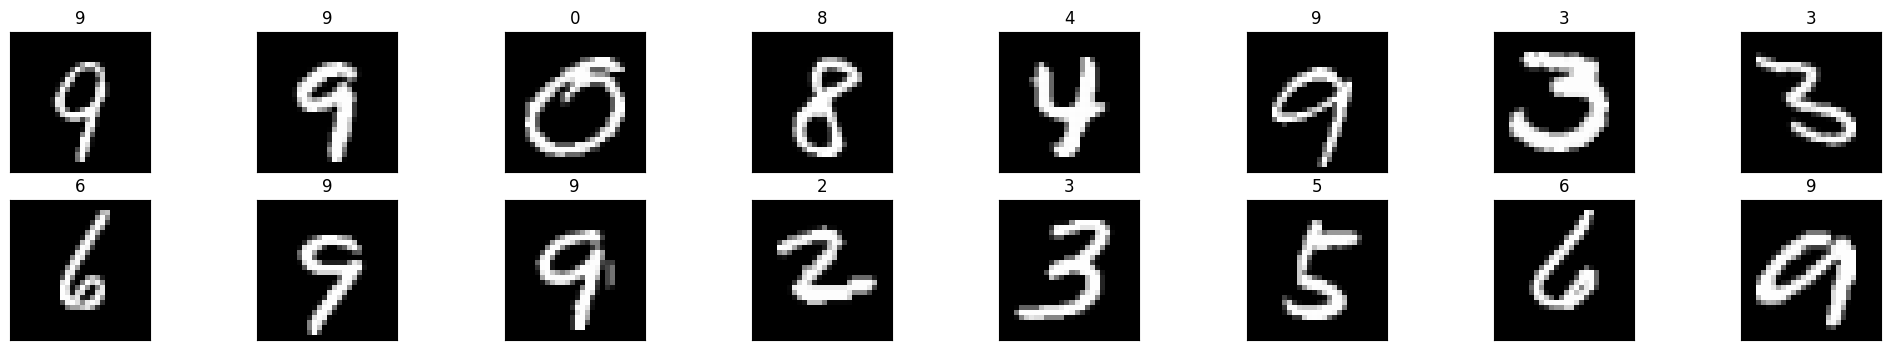

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [8]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(n_hidden_1, num_classes)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [11]:
losses = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.870
Finished Training


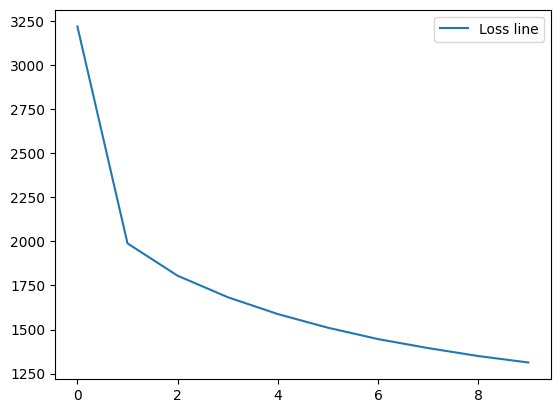

In [12]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.





*   Hiển thị một số kết quả



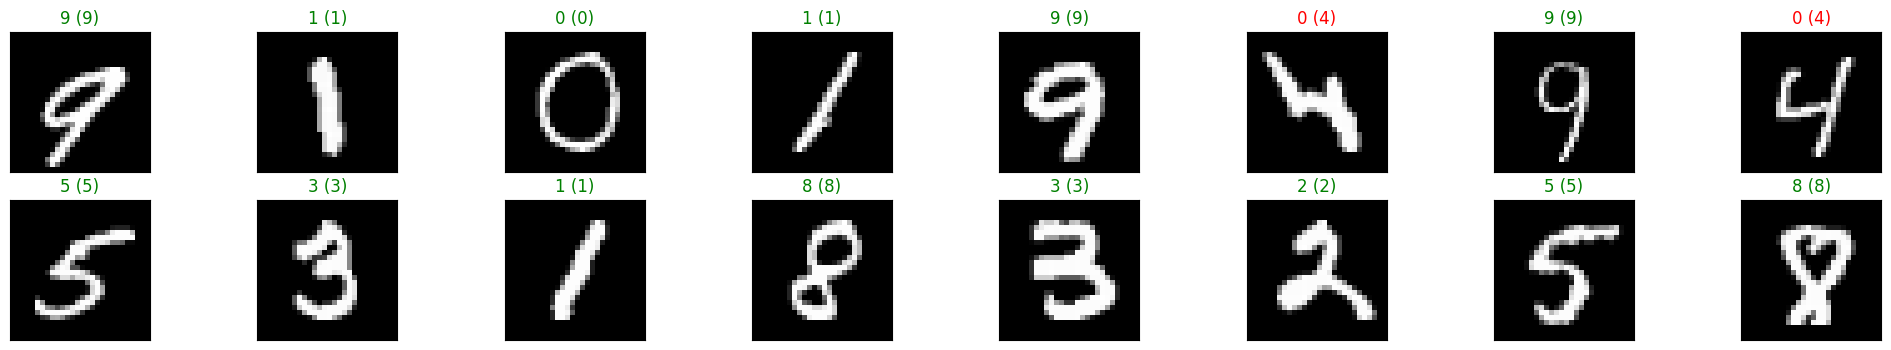

In [13]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Bài tập

*   Thiết lập thêm 3 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**.
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



Iteration: 10, accuracy: 0.972
Iteration: 20, accuracy: 0.976
Iteration: 30, accuracy: 0.978
Iteration: 40, accuracy: 0.978
Iteration: 50, accuracy: 0.979
Finished Training


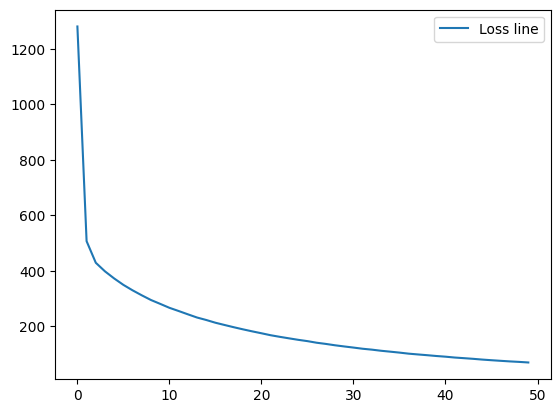

In [14]:
losses_50 = []
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses_50.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses_50))], losses_50, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

Iteration: 10, accuracy: 0.980
Iteration: 20, accuracy: 0.981
Iteration: 30, accuracy: 0.980
Iteration: 40, accuracy: 0.980
Iteration: 50, accuracy: 0.980
Iteration: 60, accuracy: 0.981
Iteration: 70, accuracy: 0.981
Iteration: 80, accuracy: 0.981
Iteration: 90, accuracy: 0.981
Iteration: 100, accuracy: 0.981
Iteration: 110, accuracy: 0.981
Iteration: 120, accuracy: 0.981
Iteration: 130, accuracy: 0.981
Iteration: 140, accuracy: 0.981
Iteration: 150, accuracy: 0.981
Finished Training


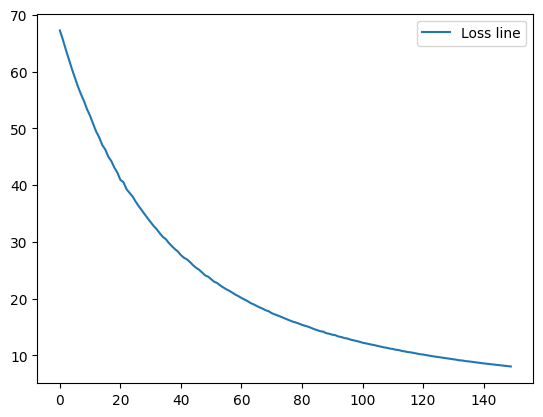

In [15]:
losses_150 = []
for epoch in range(150):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses_150.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses_150))], losses_150, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [16]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
from torch.utils.data import random_split, DataLoader, TensorDataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_size = int(0.85 * len(train_dataset))
dev_size = len(train_dataset) - train_size

train_data, dev_data = random_split(train_dataset, [train_size, dev_size])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
dev_loader = DataLoader(dev_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Số lượng mẫu trong tập train mới: {len(train_data)}")
print(f"Số lượng mẫu trong tập dev: {len(dev_data)}")
print(f"Số lượng mẫu trong tập test: {len(test_dataset)}")

Số lượng mẫu trong tập train mới: 51000
Số lượng mẫu trong tập dev: 9000
Số lượng mẫu trong tập test: 10000


In [17]:
## định nghĩa mạng
class MLPModel_3(nn.Module):
    def __init__(self):
        super(MLPModel_3, self).__init__()
        self.fc1 = nn.Linear(num_features, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

class MLPModel_5(nn.Module):
    def __init__(self):
        super(MLPModel_5, self).__init__()
        self.fc1 = nn.Linear(num_features, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize the NN
model_3 = MLPModel_3()
model_5 = MLPModel_5()
print(model_3)
print(model_5)

MLPModel_3(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
MLPModel_5(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=10, bias=True)
)


In [18]:
def accuracy(model, data_loader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

lrs = [0.1, 0.05, 0.001]
epochs = 100
best_acc = 0
best_model = None
best_model_config = {}

for lr in lrs:
    print(f"\n{'='*60}")
    print(f"Training MLPModel 3 layers | Learning Rate = {lr}")
    print(f"{'='*60}")

    model = MLPModel_3()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()

        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            avg_loss = running_loss / len(train_loader)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    dev_acc = accuracy(model, dev_loader)
    print(f'\nDev Accuracy: {dev_acc:.4f}')

    if dev_acc > best_acc:
        best_acc = dev_acc
        best_model = model
        best_model_config = {
            "name": "MLPModel 3 layers",
            "learning_rate": lr,
            "dev_accuracy": dev_acc
        }

print("\n" + "="*60)
print("TRAINING FINISHED")
print("="*60)
print(f"Best Model: {best_model_config['name']}")
print(f"Learning Rate: {best_model_config['learning_rate']}")
print(f"Dev Accuracy: {best_model_config['dev_accuracy']:.4f}")

test_acc = accuracy(best_model, test_loader)
print(f"Test Accuracy: {test_acc:.4f}")


Training MLPModel 3 layers | Learning Rate = 0.1
Epoch [10/100], Loss: 0.0210
Epoch [20/100], Loss: 0.0065
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000

Dev Accuracy: 0.9819

Training MLPModel 3 layers | Learning Rate = 0.05
Epoch [10/100], Loss: 0.0150
Epoch [20/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0001
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000

Dev Accuracy: 0.9816

Training MLPModel 3 layers | Learning Rate = 0.001
Epoch [10/100], Loss: 0.3766
Epoch [20/100], Loss: 0.2586
Epoch [30/100], Loss: 0.1873
Epoch [40/100], Loss: 0.1426
Epoch [50/100], Loss: 0.1124
Epoch [60/100], Loss: 0.0906
Epoch [70/100], Loss: 0.0734
Epoch [80/100], Lo

In [20]:
lrs = [0.1, 0.05, 0.001]
epochs = 100
best_acc = 0
best_model = None
best_model_config = {}

for lr in lrs:
    print(f"\n{'='*60}")
    print(f"Training MLPModel 5 layers | Learning Rate = {lr}")
    print(f"{'='*60}")

    model = MLPModel_5()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()

        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            avg_loss = running_loss / len(train_loader)
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    dev_acc = accuracy(model, dev_loader)
    print(f'\nDev Accuracy: {dev_acc:.4f}')

    if dev_acc > best_acc:
        best_acc = dev_acc
        best_model = model
        best_model_config = {
            "name": "MLPModel 5 layers",
            "learning_rate": lr,
            "dev_accuracy": dev_acc
        }

print("\n" + "="*60)
print("TRAINING FINISHED")
print("="*60)
print(f"Best Model: {best_model_config['name']}")
print(f"Learning Rate: {best_model_config['learning_rate']}")
print(f"Dev Accuracy: {best_model_config['dev_accuracy']:.4f}")

test_acc = accuracy(best_model, test_loader)
print(f"Test Accuracy: {test_acc:.4f}")


Training MLPModel 5 layers | Learning Rate = 0.1
Epoch [10/100], Loss: 0.0249
Epoch [20/100], Loss: 0.0055
Epoch [30/100], Loss: 0.0082
Epoch [40/100], Loss: 0.0006
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000

Dev Accuracy: 0.9821

Training MLPModel 5 layers | Learning Rate = 0.05
Epoch [10/100], Loss: 0.0180
Epoch [20/100], Loss: 0.0049
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000

Dev Accuracy: 0.9802

Training MLPModel 5 layers | Learning Rate = 0.001
Epoch [10/100], Loss: 1.7187
Epoch [20/100], Loss: 0.3240
Epoch [30/100], Loss: 0.1502
Epoch [40/100], Loss: 0.0805
Epoch [50/100], Loss: 0.0421
Epoch [60/100], Loss: 0.0200
Epoch [70/100], Loss: 0.0091
Epoch [80/100], Lo